In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel('Macroinvertebrados.xlsx', sheet_name='Prepared_macros')
df.drop(df[df['dive_date'].isnull()].index, inplace = True)
print("Las columnas del dataset son: ",df.columns)

Las columnas del dataset son:  Index(['id', 'dive_date', 'dive_month', 'year', 'Transect.code', 'Island',
       'Bioregion', 'MPA_Status', 'Sum_ind', 'Countsize_ind', 'TaxonID',
       'Domain', 'Kingdom', 'PhylumOrDivision', 'Class', 'Order', 'Family',
       'ScientificName', 'CommonNameEnglish', 'CommonNameSpanish', 'Site',
       'Latitude', 'Longitude', 'Subzone.name', 'Refuge_Level', 'depth_strata',
       'epoca'],
      dtype='object')


In [50]:
print("El CommonNameSpanish que más se repite es: ",df['CommonNameSpanish'].value_counts().idxmax()," con ",df['CommonNameSpanish'].value_counts().max()," repeticiones")

El CommonNameSpanish que más se repite es:  erizo lapicero  con  1063  repeticiones


In [38]:
# Vamos a mostrar la distribución de animales por isla
import plotly.express as px
fig = px.histogram(df, x="Island", color="CommonNameSpanish")
fig.show()


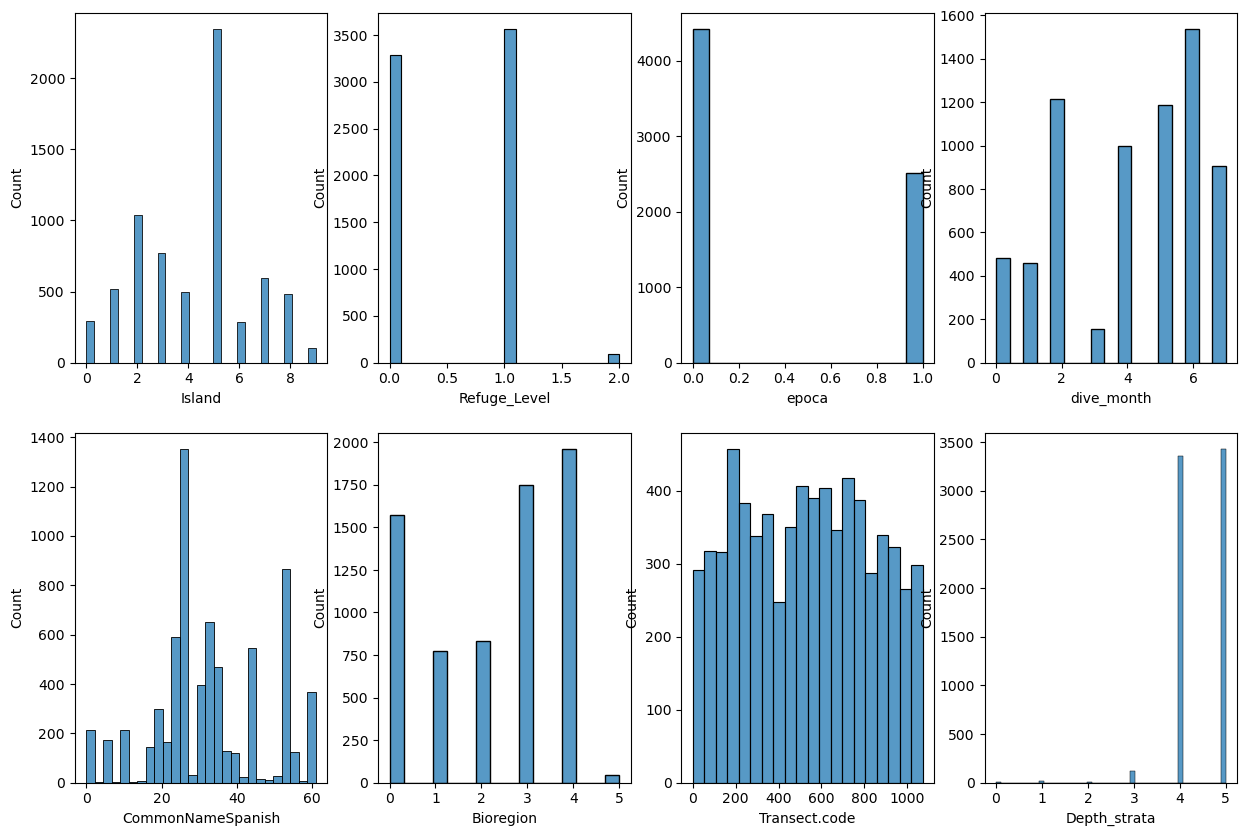

In [39]:
# Vamos a labelizar las columnas que nos interesan
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Island'] = le.fit_transform(df['Island'])
df['Refuge_Level'] = le.fit_transform(df['Refuge_Level'])
df['epoca'] = le.fit_transform(df['epoca'])
df['dive_month'] = le.fit_transform(df['dive_month'])
df['CommonNameSpanish'] = le.fit_transform(df['CommonNameSpanish'])
df['Bioregion'] = le.fit_transform(df['Bioregion'])
df['Family'] = le.fit_transform(df['Family'])
df['Depth_strata'] = le.fit_transform(df['depth_strata'])
df['Transect.code'] = le.fit_transform(df['Transect.code'])
# Ahora vamos a ver las distribuciones de las variables
fig, axs = plt.subplots(2, 4, figsize=(15, 10))
sns.histplot(data=df, x="Island",ax=axs[0,0])
sns.histplot(data=df, x="Refuge_Level",ax=axs[0,1])
sns.histplot(data=df, x="epoca",ax=axs[0,2])
sns.histplot(data=df, x="dive_month",ax=axs[0,3])
sns.histplot(data=df, x="CommonNameSpanish",ax=axs[1,0])
sns.histplot(data=df, x="Bioregion",ax=axs[1,1])
sns.histplot(data=df, x="Transect.code",ax=axs[1,2])
sns.histplot(data=df, x="Depth_strata",ax=axs[1,3])
plt.show()

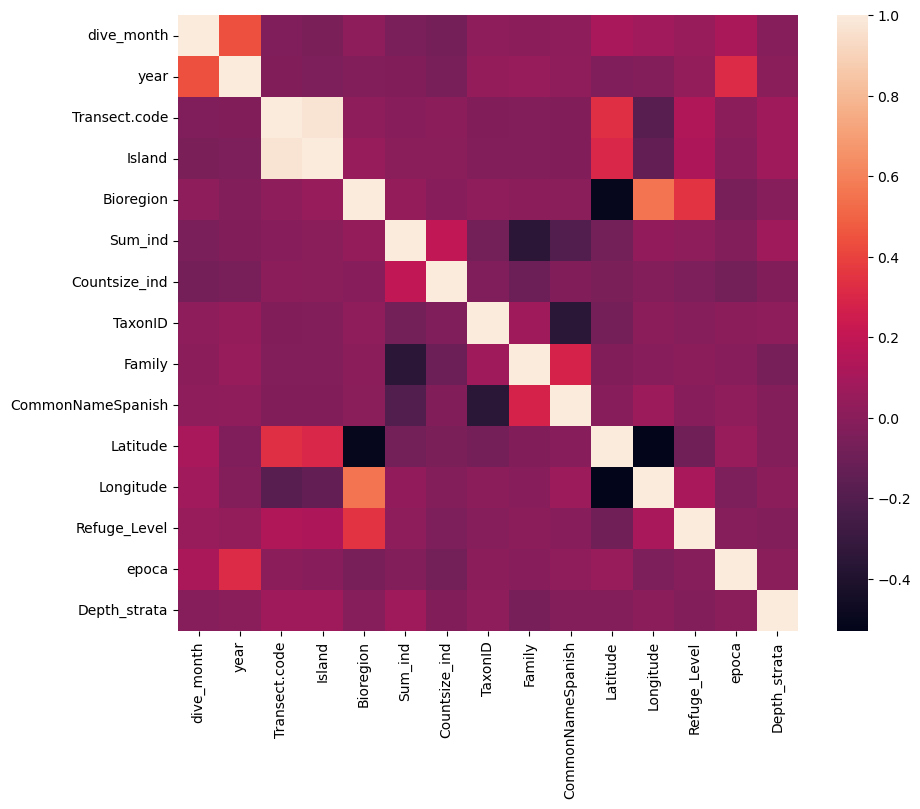

In [40]:
# Correlation matrix
# quitamos el id
df = df.drop(['id'],axis=1)
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [41]:
df.head()

,dive_date,dive_month,year,Transect.code,Island,Bioregion,MPA_Status,Sum_ind,Countsize_ind,TaxonID,...,CommonNameEnglish,CommonNameSpanish,Site,Latitude,Longitude,Subzone.name,Refuge_Level,depth_strata,epoca,Depth_strata
0,2010-02-04,2,2010,56,1,4,Extractive use,1,1,7980.0,...,Hatpin urchin,20,ES01-Bahía Gardner Norte (1),-1.34421,-89.6682,Conservación,0,6m,0,5
1,2010-02-04,2,2010,56,1,4,Extractive use,203,95,7983.0,...,Slate pencil urchin,25,ES01-Bahía Gardner Norte (1),-1.34421,-89.6682,Conservación,0,6m,0,5
2,2010-02-04,2,2010,56,1,4,Extractive use,4,4,7998.0,...,Sea cucumber,52,ES01-Bahía Gardner Norte (1),-1.34421,-89.6682,Conservación,0,6m,0,5
3,2010-02-04,2,2010,56,1,4,Extractive use,45,45,7981.0,...,Green sea urchin,27,ES01-Bahía Gardner Norte (1),-1.34421,-89.6682,Conservación,0,6m,0,5
4,2010-02-04,2,2010,57,1,4,Extractive use,5,5,7980.0,...,Hatpin urchin,20,ES01-Bahía Gardner Norte (1),-1.34421,-89.6682,Conservación,0,15m,0,4


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6933 entries, 0 to 7024
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dive_date          6933 non-null   datetime64[ns]
 1   dive_month         6933 non-null   int64         
 2   year               6933 non-null   int64         
 3   Transect.code      6933 non-null   int64         
 4   Island             6933 non-null   int64         
 5   Bioregion          6933 non-null   int64         
 6   MPA_Status         6933 non-null   object        
 7   Sum_ind            6933 non-null   int64         
 8   Countsize_ind      6933 non-null   int64         
 9   TaxonID            6691 non-null   float64       
 10  Domain             6691 non-null   object        
 11  Kingdom            6691 non-null   object        
 12  PhylumOrDivision   6691 non-null   object        
 13  Class              6691 non-null   object        
 14  Order   

In [43]:
df.describe()

,dive_month,year,Transect.code,Island,Bioregion,Sum_ind,Countsize_ind,TaxonID,Family,CommonNameSpanish,Latitude,Longitude,Refuge_Level,epoca,Depth_strata
count,6933.000000,6933.000000,6933.000000,6933.000000,6933.000000,6933.000000,6933.000000,6691.000000,6933.000000,6933.000000,6888.000000,6888.000000,6933.000000,6933.000000,6933.000000
mean,4.157075,2014.464734,527.971441,4.226020,2.271455,60.396221,4.475552,8381.865342,23.724794,32.567143,-0.231837,-90.985973,0.539016,0.362758,4.461993
std,2.153177,3.366501,298.403681,2.184336,1.545012,156.893039,15.769021,1965.223098,12.222493,14.567985,0.786360,0.690677,0.523357,0.480830,0.585854
min,0.000000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7591.000000,0.000000,0.000000,-1.378440,-92.007517,0.000000,0.000000,0.000000
25%,2.000000,2012.000000,261.000000,2.000000,1.000000,1.000000,0.000000,7977.000000,11.000000,23.000000,-0.702660,-91.437000,0.000000,0.000000,4.000000
50%,5.000000,2014.000000,534.000000,5.000000,3.000000,3.000000,1.000000,7983.000000,26.000000,31.000000,-0.273900,-91.337960,1.000000,0.000000,4.000000
75%,6.000000,2017.000000,773.000000,5.000000,4.000000,22.000000,3.000000,7998.000000,31.000000,45.000000,-0.040370,-90.468170,1.000000,1.000000,5.000000
max,7.000000,2020.000000,1071.000000,9.000000,5.000000,2125.000000,423.000000,19516.000000,47.000000,61.000000,1.680950,-89.517900,2.000000,1.000000,5.000000


In [44]:
df['dive_date'] = pd.to_datetime(df['dive_date'])
df['dive_date'].head()

0   2010-02-04
1   2010-02-04
2   2010-02-04
3   2010-02-04
4   2010-02-04
Name: dive_date, dtype: datetime64[ns]

<Figure size 1500x1000 with 0 Axes>

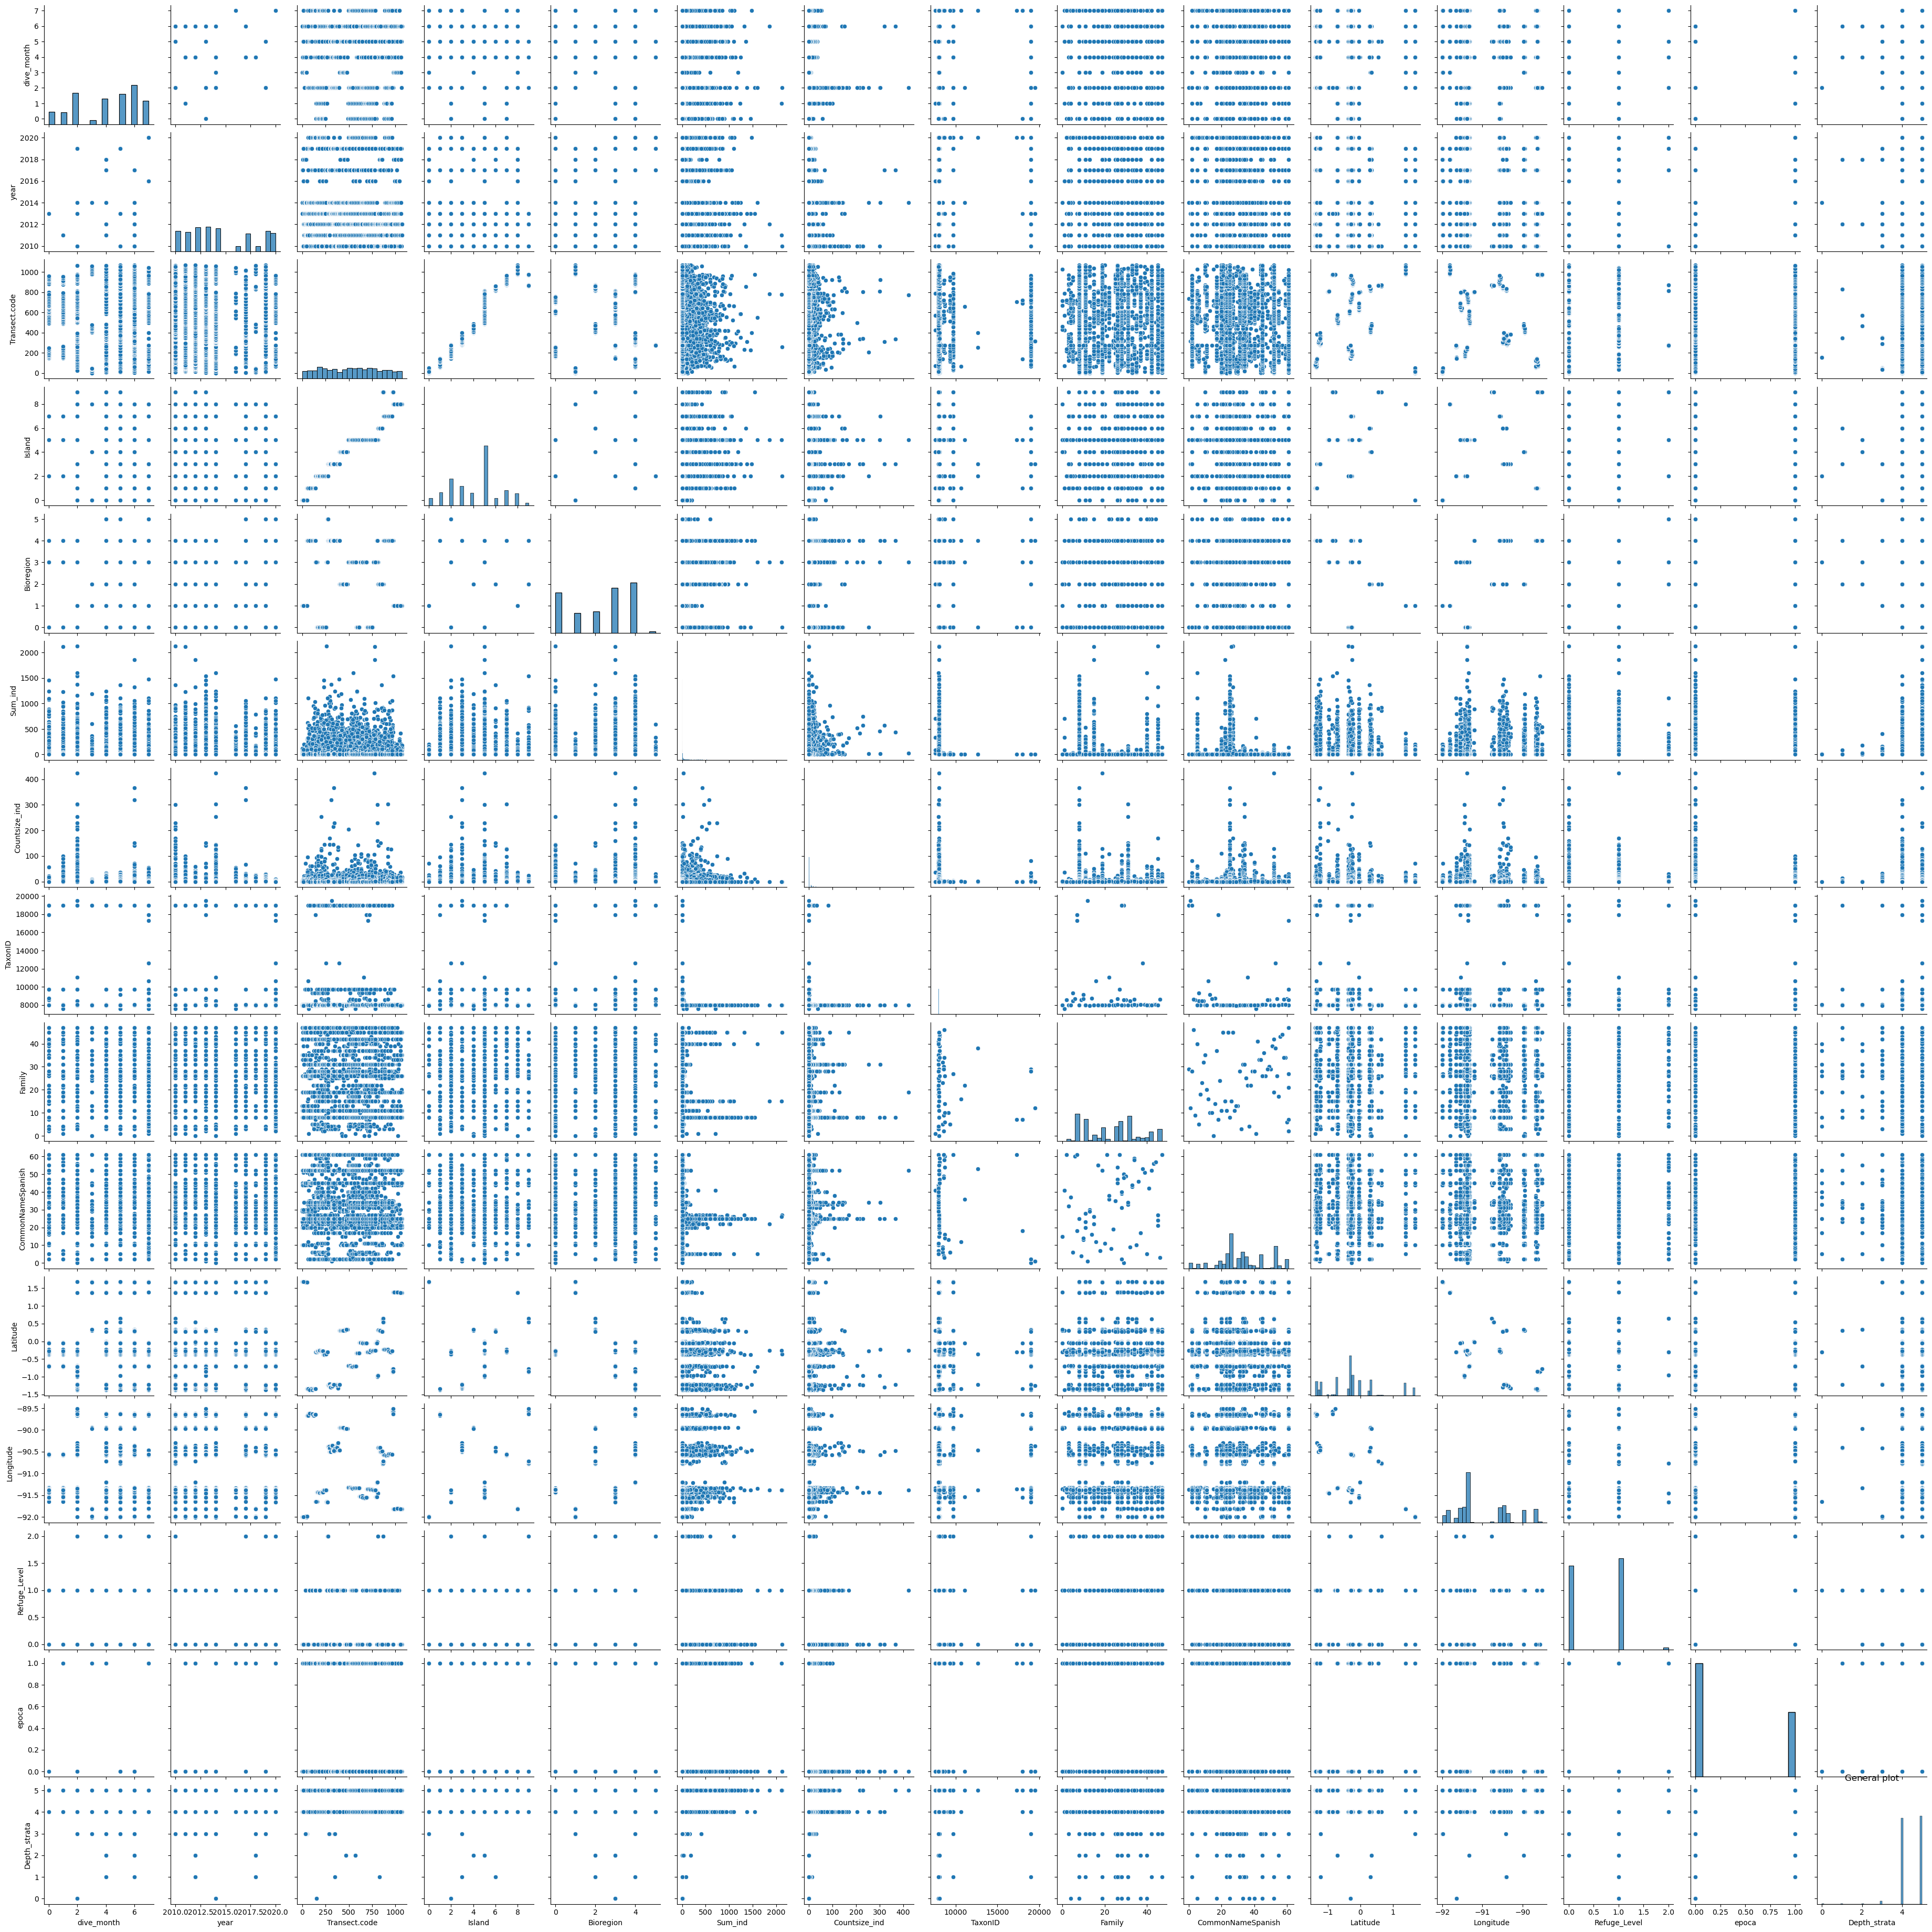

In [45]:
# General plot
plt.figure(figsize=(15,10))
sns.pairplot(df, diag_kind='hist', palette='viridis')
plt.title('General plot')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()


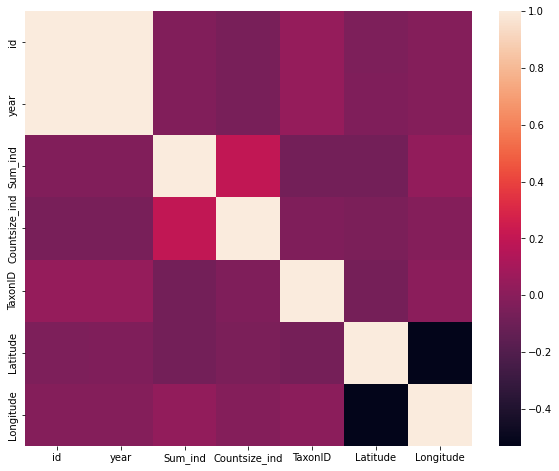

In [23]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [51]:
import plotly.express as px
df_mod_epoca_calida = df[df['epoca'] == 'Caliente']
fig = px.scatter_mapbox(df_mod_epoca_calida, 
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="Transect.code",
                        hover_data=["CommonNameSpanish", "Transect.code", "Latitude", "Longitude"],
                        color="CommonNameSpanish",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# Make the plot BIGGER
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    )
fig.show()

In [52]:
import plotly.express as px
df_mod_epoca_calida = df[df['epoca'] != 'Caliente']
fig = px.scatter_mapbox(df_mod_epoca_calida, 
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="Transect.code",
                        hover_data=["CommonNameSpanish", "Transect.code", "Latitude", "Longitude"],
                        color="CommonNameSpanish",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# Make the plot BIGGER
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    )
fig.show()